In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

In [90]:
def handle_dfs(stock_name, stock_code, finbert = False):
    temp = yf.Ticker(stock_code)
    yf_df = temp.history(start="2023-01-01")
    yf_df = yf_df.Close
    yf_df.dropna(inplace=True)
    #yf_df['Date'] = yf_df['Date'].dt.tz_localize(None)
    reset_df = yf_df.reset_index()
    reset_df['date_sanitized'] = reset_df['Date'].astype(str).apply(lambda x: x.split(' ')[0])
    if finbert:
        
        df = pd.read_excel('data/{}_predictions_finbert.xlsx'.format(stock_name))
        df = df[df['stock'] == stock_name]
        merge_df = pd.merge(df, reset_df, on='date_sanitized')

        bad_new_prices = merge_df[merge_df['Predicted_Finbert'] == 0]['Close']
        bad_new_dates = merge_df[merge_df['Predicted_Finbert'] == 0]['Date']

        good_new_prices = merge_df[merge_df['Predicted_Finbert'] == 1]['Close']
        good_new_dates = merge_df[merge_df['Predicted_Finbert'] == 1]['Date']
    else: 
        df = pd.read_excel('data/{}_predictions.xlsx'.format(stock_name))
        df = df[df['stock'] == stock_name]
        
        merge_df = pd.merge(df, reset_df, on='date_sanitized')
    
    
        bad_new_prices = merge_df[merge_df['Predicted'] == 0]['Close']
        bad_new_dates = merge_df[merge_df['Predicted'] == 0]['Date']

        good_new_prices = merge_df[merge_df['Predicted'] == 1]['Close']
        good_new_dates = merge_df[merge_df['Predicted'] == 1]['Date']

    
    return bad_new_prices, bad_new_dates, good_new_prices, good_new_dates, reset_df

# Apple

In [64]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("apple", "AAPL")

print(df.head())
print(neg_price)
print(neg_date)

(8, 11)
   Unnamed: 0     typee       sectionId     sectionName  \
0          55   article      technology      Technology   
1         125   article      technology      Technology   
2         379   article      technology      Technology   
3         409   article        business        Business   
4         429   article  australia-news  Australia news   
5         449   article      technology      Technology   
6         542   article      technology      Technology   
7         832  liveblog        business        Business   

                                            webtitle         publisheddate  \
0       Apple posts first revenue drop in four years  2023-02-02T22:50:07Z   
1  Apple revenues fall for third straight quarter...  2023-08-03T21:39:49Z   
2  Apple HomePod review: a Siri speaker with a ba...  2023-03-20T07:00:04Z   
3  Just Eat unveils €150m share buyback a month a...  2023-04-19T11:42:15Z   
4  Apple and Google face block on taking cut from...  2023-07-19T00:00

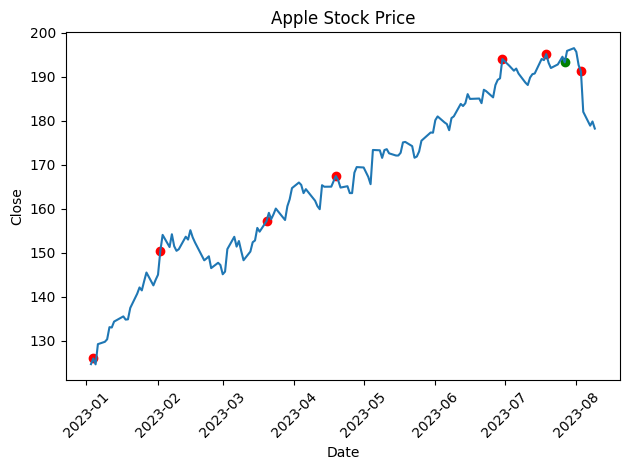

In [45]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

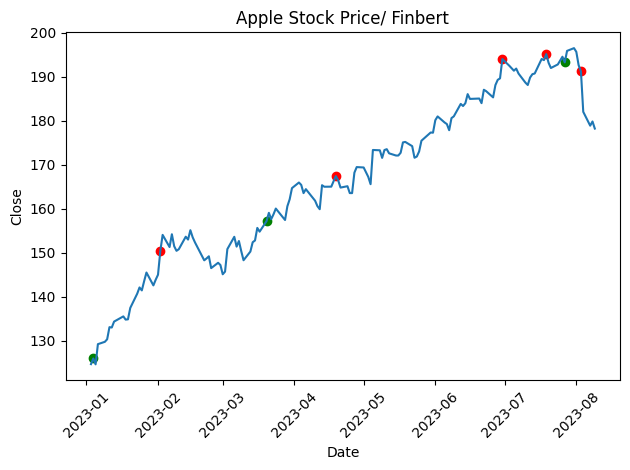

In [66]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("apple", "AAPL", finbert = True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Amazon

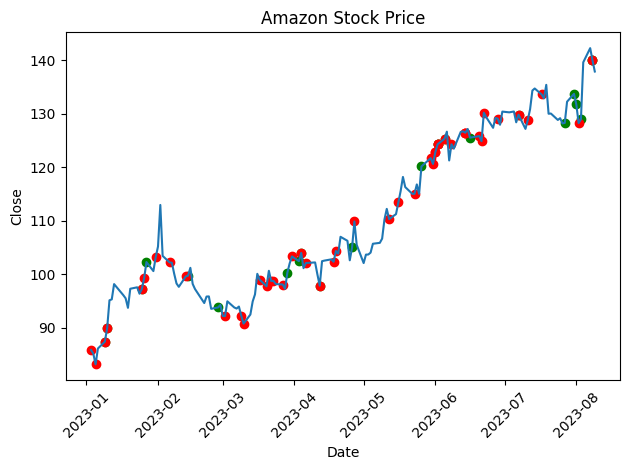

In [91]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("amazon", "AMZN")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()


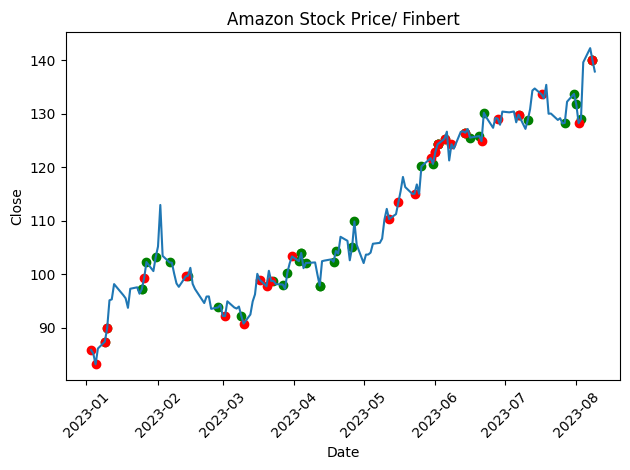

In [92]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("amazon", "AMZN", finbert = True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Tesla

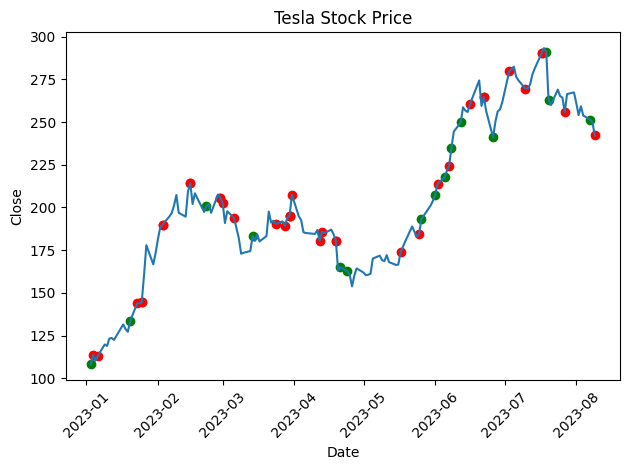

In [93]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("tesla", "TSLA")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Tesla Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

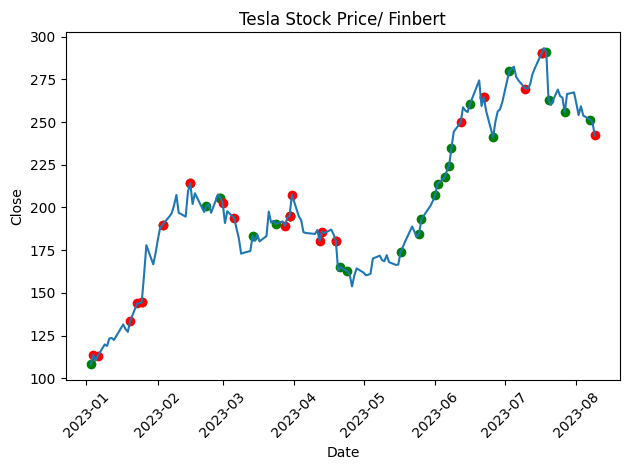

In [94]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("tesla", "TSLA", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Tesla Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Microsoft

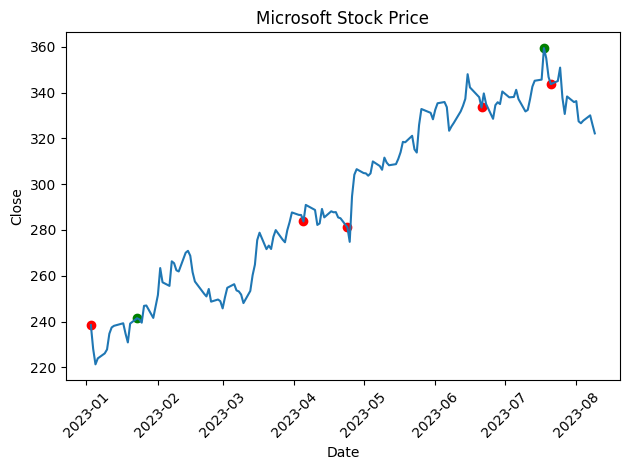

In [95]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("microsoft", "MSFT")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

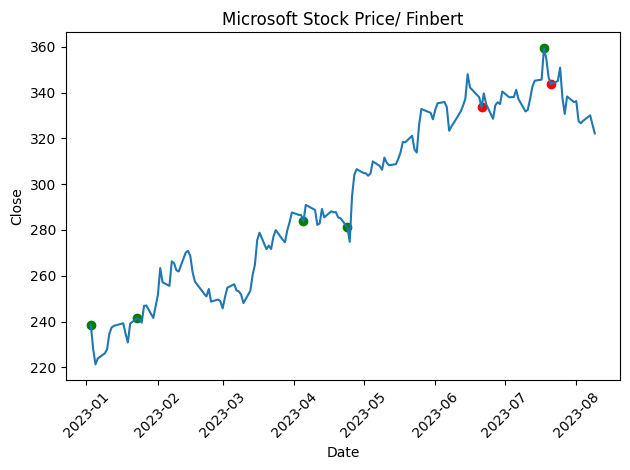

In [96]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("microsoft", "MSFT", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Google

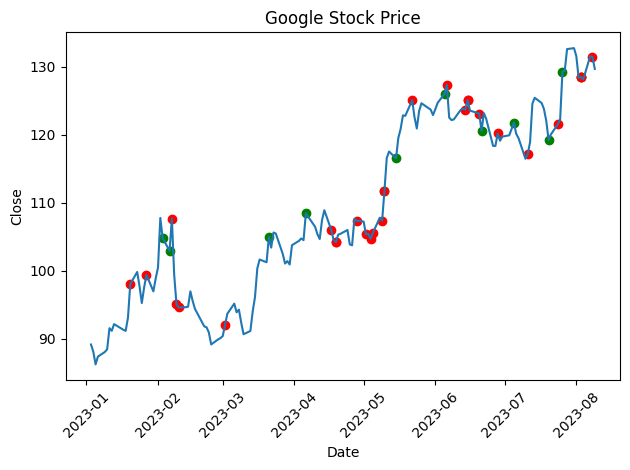

In [97]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("google", "GOOGL")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

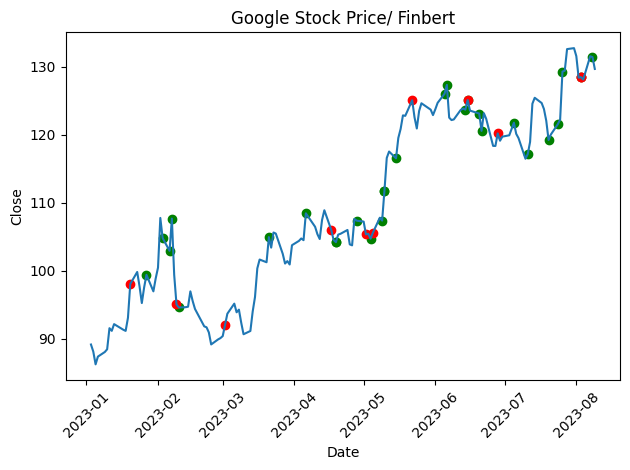

In [98]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("google", "GOOGL", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price/ Finbert' )
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()